In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
history_XGBoost = pd.read_csv('../history/history_dataset_XGBoost.csv')
history_DecisionTree = pd.read_csv('../history/history_dataset_DecisionTree.csv')
history_RandomForest = pd.read_csv('../history/history_dataset_RandomForest.csv')
history_bo_XGBoost = pd.read_csv('../history_bayes/history_bayes_all_XGBoost.csv')
history_bo_DecisionTree = pd.read_csv('../history_bayes/history_bayes_all_DecisionTree.csv')
history_bo_RandomForest = pd.read_csv('../history_bayes/history_bayes_all_RandomForest.csv')


# Preparing all models history for plotting

In [3]:
def prepare_history_for_plotting(df):
    df['best_score_sofar'] = 0.0
    df.loc[0,'best_score_sofar'] = df.loc[0,'mean_test_score']
    for i in range(1, len(df)):
        if(df.loc[i,'dataset'] != df.loc[i-1,'dataset']):
            df.loc[i,'best_score_sofar'] = df.loc[i,'mean_test_score']
        df.loc[i,'best_score_sofar'] = max(df.loc[i-1,'best_score_sofar'], df.loc[i,'mean_test_score'])
    return df

In [4]:
history_XGBoost = prepare_history_for_plotting(history_XGBoost)
history_DecisionTree = prepare_history_for_plotting(history_DecisionTree)
history_RandomForest = prepare_history_for_plotting(history_RandomForest)
history_bo_XGBoost = prepare_history_for_plotting(history_bo_XGBoost)
history_bo_DecisionTree = prepare_history_for_plotting(history_bo_DecisionTree)
history_bo_RandomForest = prepare_history_for_plotting(history_bo_RandomForest)

# Plots Random Search

In [5]:
def plotting_score_progress(df_hm1,df_hm2,df_hm3, dataset):
    plt.plot(range(len(df_hm1)//4), df_hm1[df_hm1['dataset']==dataset]['best_score_sofar'])
    plt.plot(range(len(df_hm2)//4), df_hm2[df_hm2['dataset']==dataset]['best_score_sofar'])
    plt.plot(range(len(df_hm3)//4), df_hm3[df_hm3['dataset']==dataset]['best_score_sofar'])
    plt.xlabel('Number of iterations')
    plt.ylabel('AUC score')
    plt.legend(['XGBoost', 'DecisionTree', 'RandomForest'])
    plt.title('Best score progress for dataset ' + str(dataset))

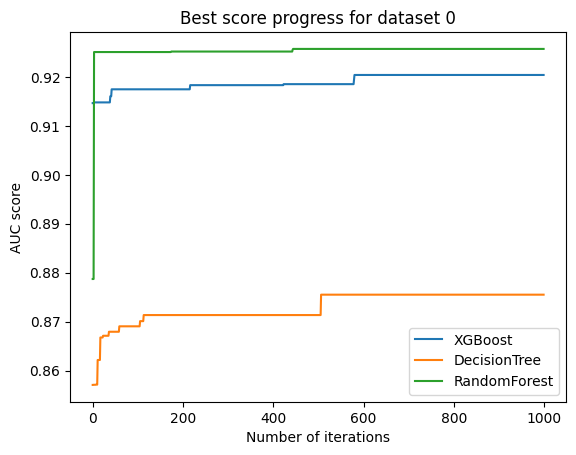

In [6]:
plotting_score_progress(history_XGBoost, history_DecisionTree, history_RandomForest, 0)


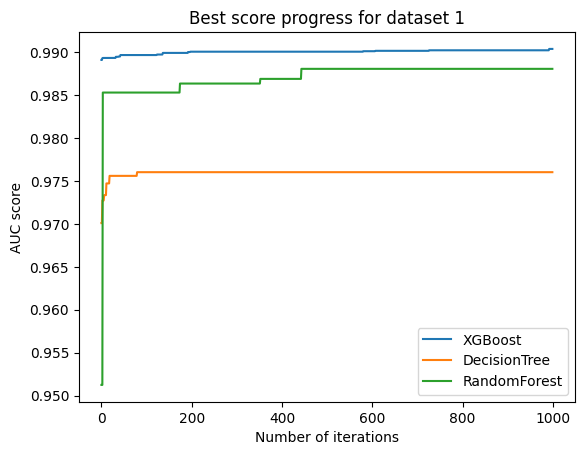

In [7]:
plotting_score_progress(history_XGBoost, history_DecisionTree, history_RandomForest, 1)

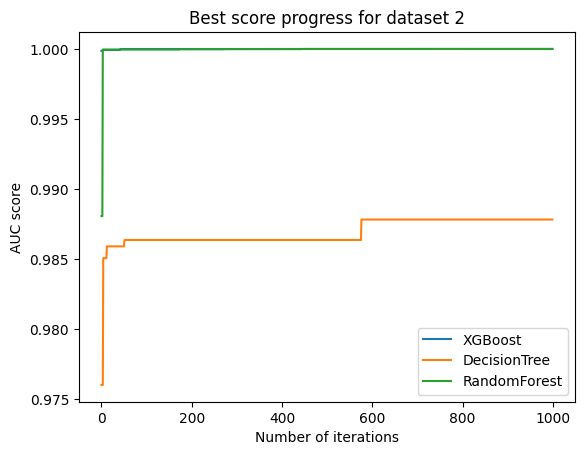

In [8]:
plotting_score_progress(history_XGBoost, history_DecisionTree, history_RandomForest, 2)

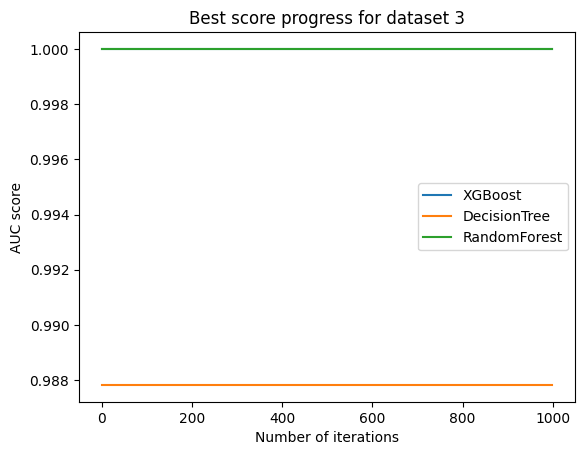

In [9]:
plotting_score_progress(history_XGBoost, history_DecisionTree, history_RandomForest, 3)

# Plots Bayes Optimization

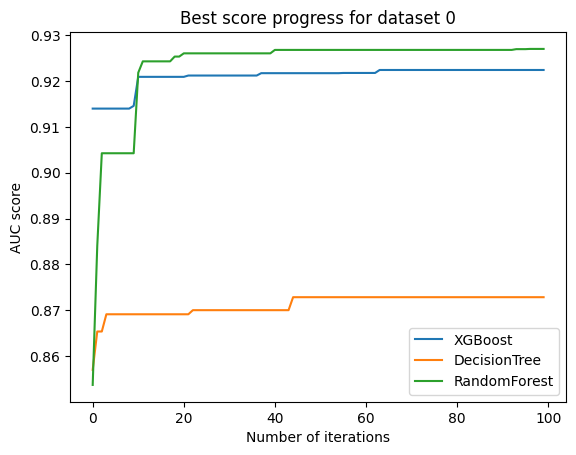

In [10]:
plotting_score_progress(history_bo_XGBoost, history_bo_DecisionTree, history_bo_RandomForest, 0)

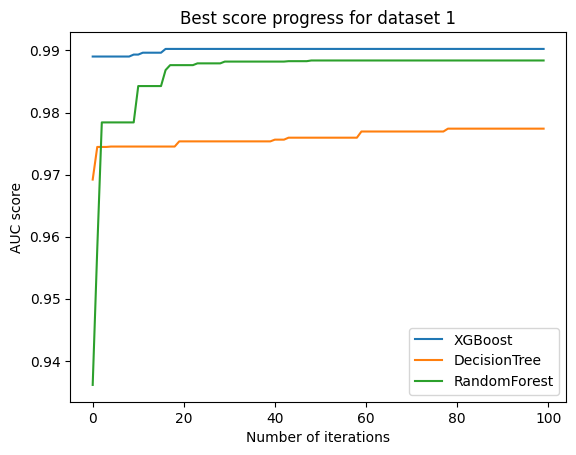

In [11]:
plotting_score_progress(history_bo_XGBoost, history_bo_DecisionTree, history_bo_RandomForest, 1)

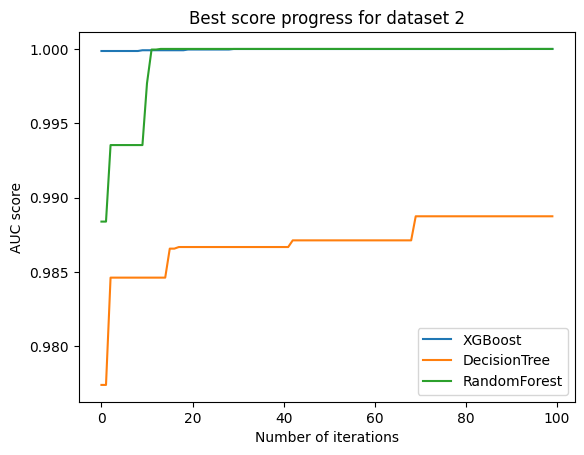

In [12]:
plotting_score_progress(history_bo_XGBoost, history_bo_DecisionTree, history_bo_RandomForest, 2)

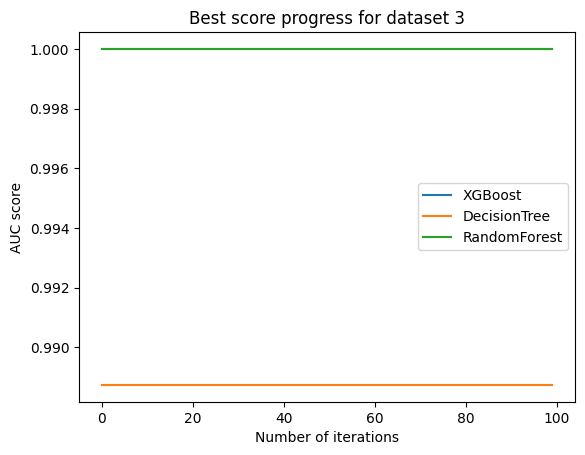

In [13]:
plotting_score_progress(history_bo_XGBoost, history_bo_DecisionTree, history_bo_RandomForest, 3)